# Bone Marrow (Levine et al.)

Article: [Data-Driven Phenotypic Dissection of AML Reveals Progenitor-like Cells that Correlate with Prognosis](https://doi.org/10.1016/j.cell.2015.05.047)

In [1]:
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
import scprep
import scanpy as sc
import fcsparser
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

import sklearn.metrics

from tqdm.notebook import tqdm

sc.settings.set_figure_params(dpi=80, facecolor='white')

## Data Preparation

In [2]:
meta, data = fcsparser.parse("../../levine/Levine_32dim_notransform.fcs", reformat_meta=True)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\fcsparser\api.py:356: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


In [3]:
cell_type_df = pd.read_table("../../levine/population_names_Levine_32dim.txt")
cell_type_dict = cell_type_df.label.tolist()

In [4]:
data

,Time,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,...,CD117,CD49d,HLA-DR,CD64,CD41,Viability,file_number,event_number,label,individual
0,2693.0000,22.0,201.783295,253.016647,0.817049,-0.147947,-0.033482,0.332183,-0.045922,1.858334,...,0.265375,4.804858,12.734092,-0.026878,-0.009804,3.474168,94.0,307.0,1.0,1.0
1,3736.0000,35.0,191.828598,308.869080,3.801385,-0.191446,-0.083274,0.372388,4.494379,-0.177158,...,0.448901,0.995556,2.558165,0.726602,4.905976,2.956692,94.0,545.0,1.0,1.0
2,7015.0000,32.0,116.111923,200.839218,3.204439,-0.161106,0.369613,-0.214952,-0.009404,-0.043904,...,0.231194,33.025459,8.574364,-0.054804,-0.052067,3.443209,94.0,1726.0,1.0,1.0
3,7099.0000,29.0,176.248505,313.022461,2.237382,-0.138071,-0.088311,-0.220430,4.006598,-0.095335,...,0.332596,8.879428,0.704930,-0.067247,-0.130211,-0.132632,94.0,1766.0,1.0,1.0
4,7700.0000,25.0,133.332779,226.467758,-0.044047,-0.151509,0.402548,2.581769,6.742060,2.906627,...,-0.031117,0.909562,0.993077,0.381205,-0.202496,1.435457,94.0,2031.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265622,707951.4375,41.0,2305.191162,3131.641357,10.345075,-0.095875,-0.278241,-0.036303,0.317188,0.729079,...,-0.055526,2.797205,0.620372,-0.212540,-0.139874,1.195905,98.0,102686.0,NaN,2.0
265623,708145.4375,45.0,2217.376953,3198.114258,0.585101,-0.281215,-0.044320,-0.175828,-0.209287,5.648056,...,0.721827,8.194910,0.236164,-0.039998,-0.129067,-0.017502,98.0,102690.0,NaN,2.0
265624,708398.4375,41.0,2455.673340,3157.416260,3.698715,-0.031322,-0.130569,-0.154208,-0.173241,11.841664,...,0.436060,-0.279705,2.614141,0.269550,-0.213073,0.537059,98.0,102701.0,NaN,2.0
265625,708585.4375,39.0,2395.883789,3167.325439,1.463955,-0.056550,-0.244025,0.370252,-0.158964,0.394406,...,-0.239947,0.510660,1231.869141,1.506284,0.969914,3.307683,98.0,102706.0,NaN,2.0


(array([1.0314604e+07, 8.9312000e+04, 7.0295000e+04, 6.9794000e+04,
        6.4115000e+04, 5.5185000e+04, 3.3056000e+04, 2.3468000e+04,
        8.3960000e+03, 1.0390000e+03]),
 array([-2.9138437e-01,  7.0911984e+04,  1.4182425e+05,  2.1273653e+05,
         2.8364881e+05,  3.5456106e+05,  4.2547334e+05,  4.9638562e+05,
         5.6729788e+05,  6.3821019e+05,  7.0912244e+05], dtype=float32),
 <BarContainer object of 10 artists>)

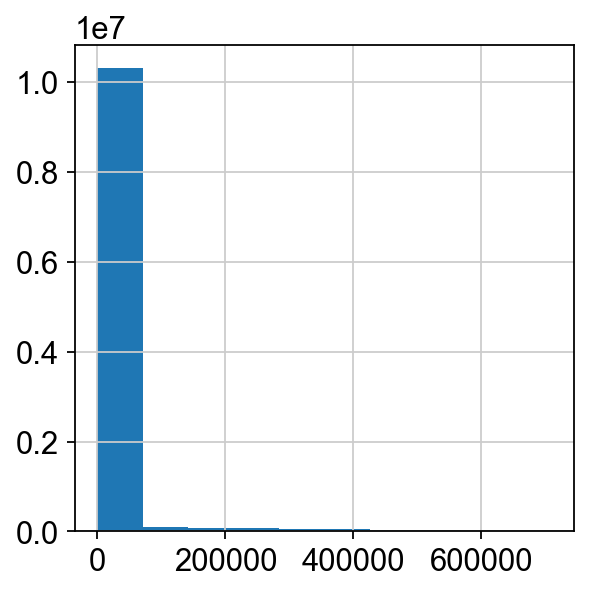

In [5]:
plt.hist(data.values.reshape([-1]))

In [6]:
np.random.seed(0)

In [7]:
data = data[~data.label.isna()]
data.shape

(104184, 41)

In [8]:
data.label.value_counts()

7.0     26366
10.0    21099
8.0     20108
9.0     16520
13.0     6135
2.0      3905
4.0      3295
3.0      2248
11.0     1238
1.0      1207
6.0       916
14.0      513
12.0      330
5.0       304
Name: label, dtype: int64

In [9]:
np.mean(data, axis=0)

Time            276478.531250
Cell_length         34.430950
DNA1               684.012207
DNA2               992.205688
CD45RA               5.079967
CD133                0.749893
CD19                 5.972546
CD22                 4.606853
CD11b                9.513360
CD4                  2.603396
CD8                  8.381186
CD34                 4.057331
Flt3                 2.719659
CD20                 5.859529
CXCR4                5.838455
CD235ab              4.725650
CD45               727.466614
CD123                5.640072
CD321               23.248325
CD14                 0.419198
CD33                 2.484559
CD47                50.751251
CD11c                9.642146
CD7                 16.734358
CD15                 1.180270
CD16                 1.901266
CD44               163.731247
CD38                39.193321
CD13                 2.337435
CD3                149.481522
CD61                 1.374841
CD117                0.809172
CD49d                5.396836
HLA-DR    

In [10]:
labels = [cell_type_dict[int(i - 1)] for i in data['label']]

In [11]:
data = data[meta['_channels_']['$PnN'][4:36].tolist()]
data[data < 0.] = 0.

In [12]:
adata = sc.AnnData(data)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [13]:
adata

AnnData object with n_obs × n_vars = 104184 × 32

In [14]:
adata.obs['label'] = labels

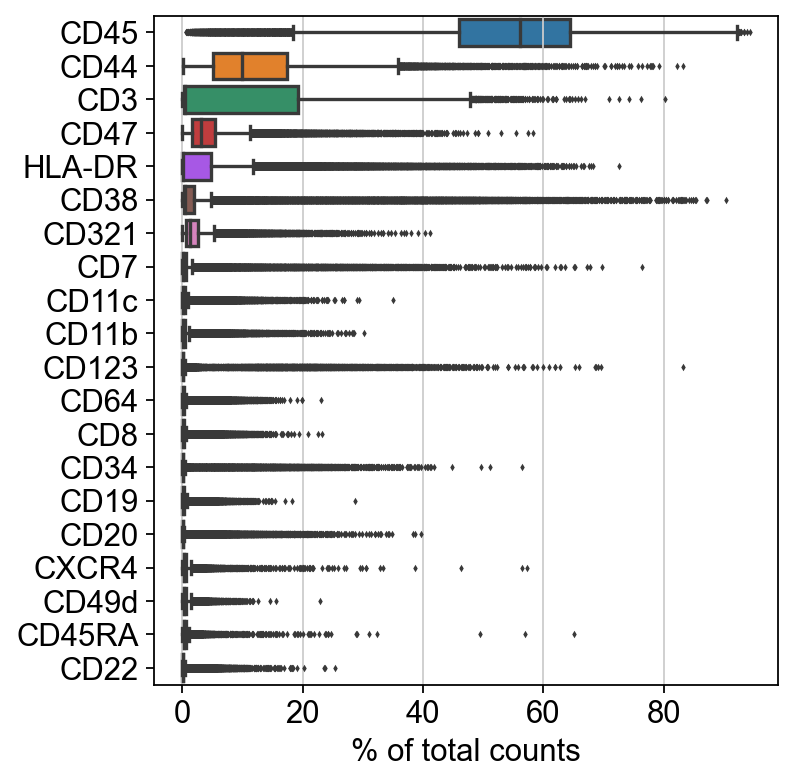

In [15]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [16]:
#sc.pp.filter_cells(adata, min_genes=25)

In [17]:
sc.pp.calculate_qc_metrics(adata,  percent_top=None, log1p=False, inplace=True)

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

### PCA

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'label' as categorical


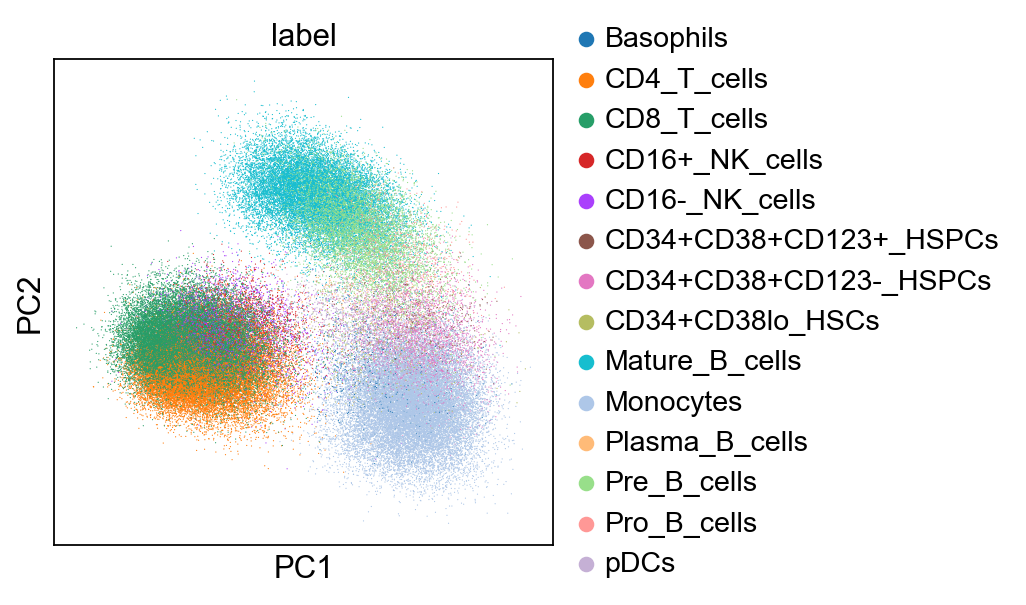

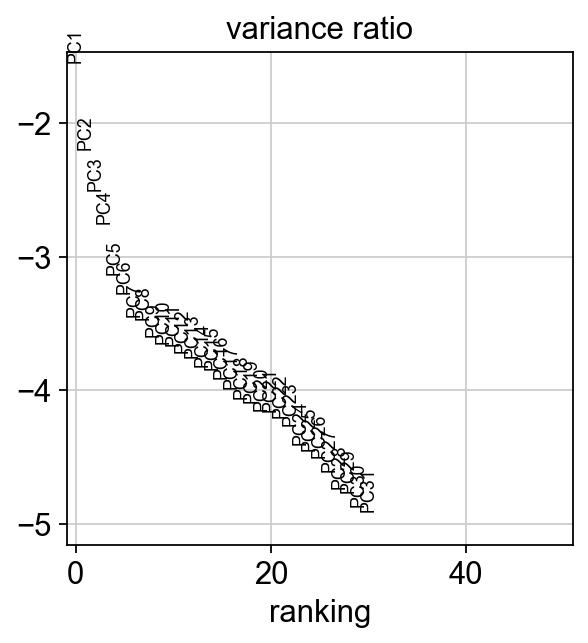

In [19]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='label')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

### UMAP

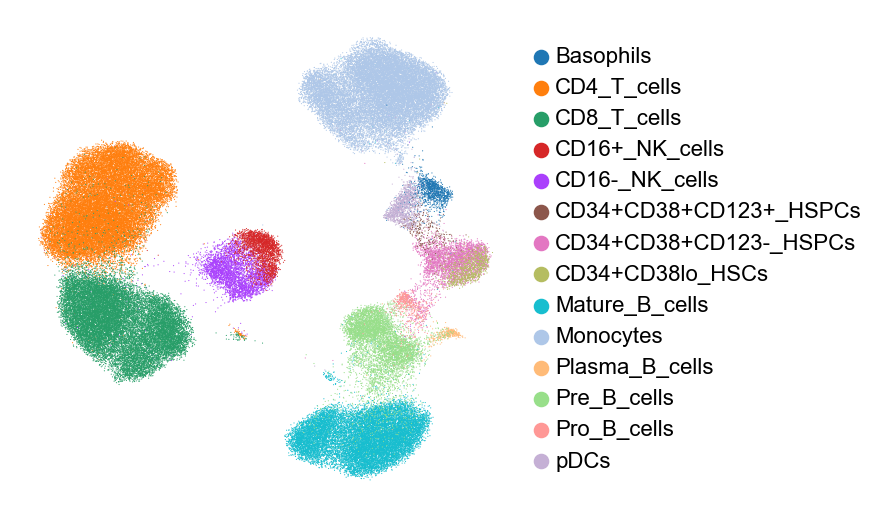

In [20]:
sc.pp.neighbors(adata, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['label'], frameon=False, size=1., legend_fontsize=10, title='')

## SCMER Marker Selection

In [21]:
np.random.seed(0)
subset_adata = adata[np.random.choice(adata.shape[0], 5000, False), :]

import sys
sys.path.insert(0, '..')
import scmer

model = scmer.UmapL1(w=1., lasso=2.4e-2, ridge=0., n_pcs=30, perplexity=100., use_beta_in_Q=True, n_threads=6, 
                             max_outer_iter=2)
model.fit(subset_adata.X)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Calculating distance matrix and scaling factors...
Computing pairwise distances...
Using 6 threads...
Mean value of sigma: 0.540678
Done. Elapsed time: 21.53 seconds. Total: 21.53 seconds.
Creating model without batches...
Optimizing using OWLQN (because lasso is nonzero)...
0 loss: 3.320998191833496 Nonzero: 19 Elapsed time: 51.57 seconds. Total: 73.11 seconds.
1 loss: 3.216078281402588 Nonzero: 19 Elapsed time: 24.27 seconds. Total: 97.38 seconds.
final loss: 2.9716053009033203 Nonzero: 19 Elapsed time: 0.83 seconds. Total: 98.21 seconds.


<BarContainer object of 32 artists>

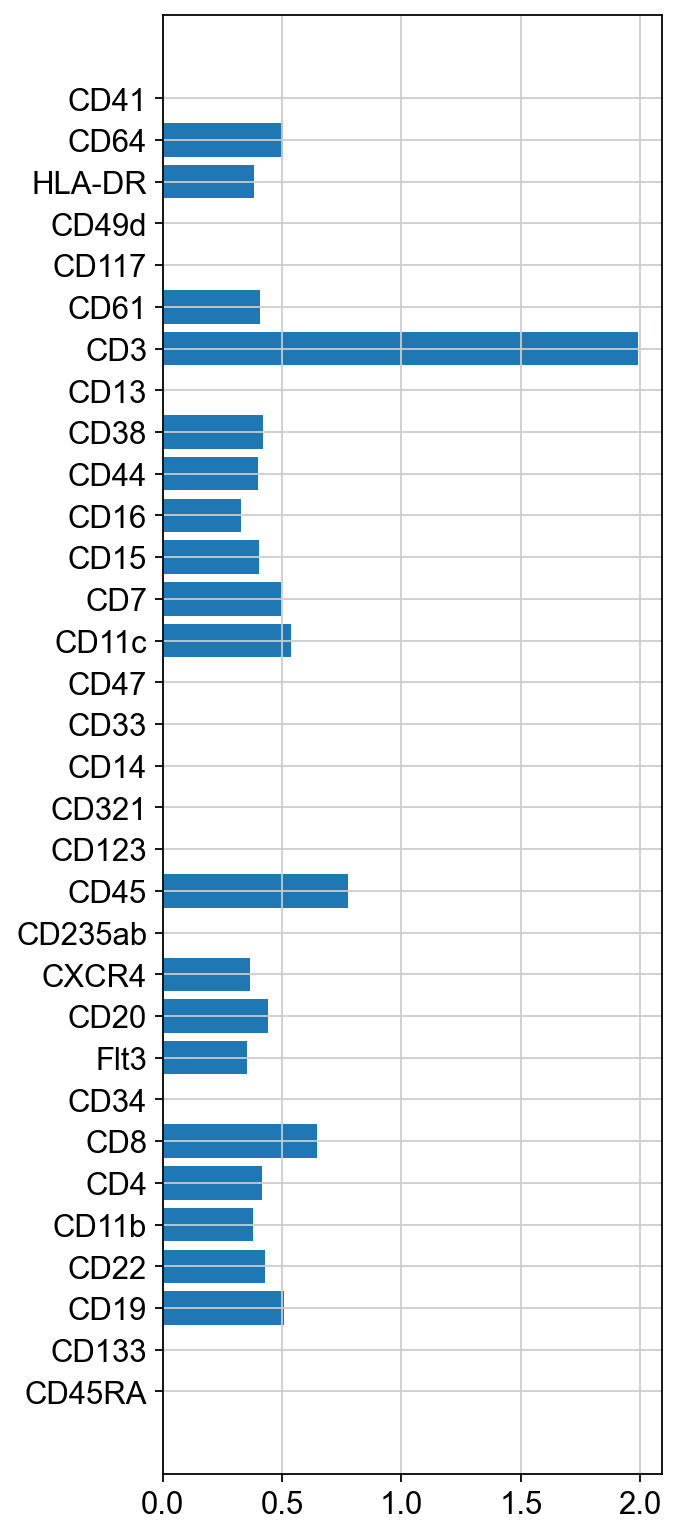

In [22]:
plt.figure(figsize=(4, 12))
plt.barh(adata.var.index, np.abs(model.w))

In [23]:
selected_genes = subset_adata.var_names[model.w > 0.]

## Validation

### PCA and UMAP

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


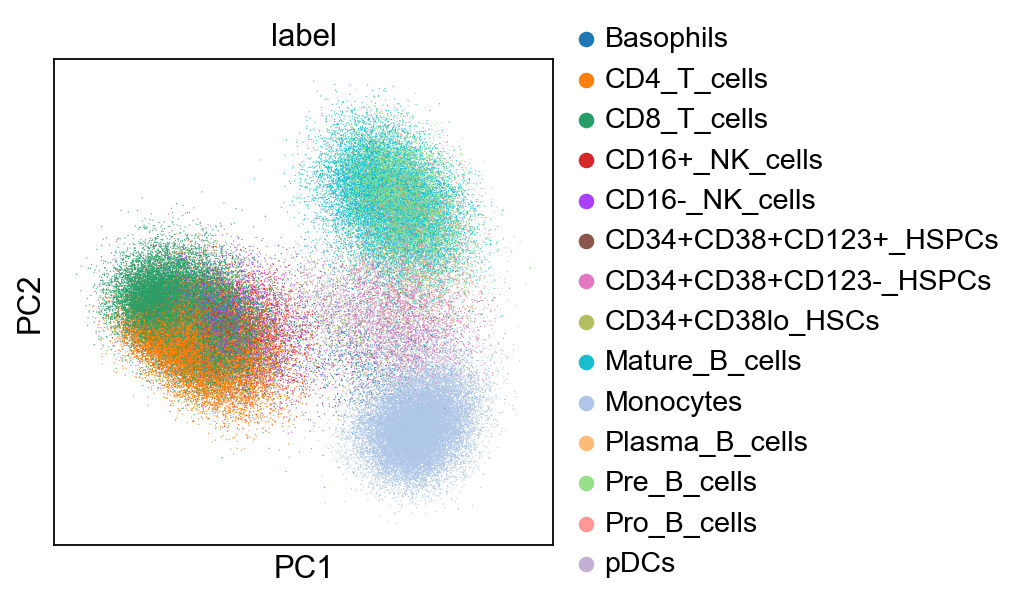

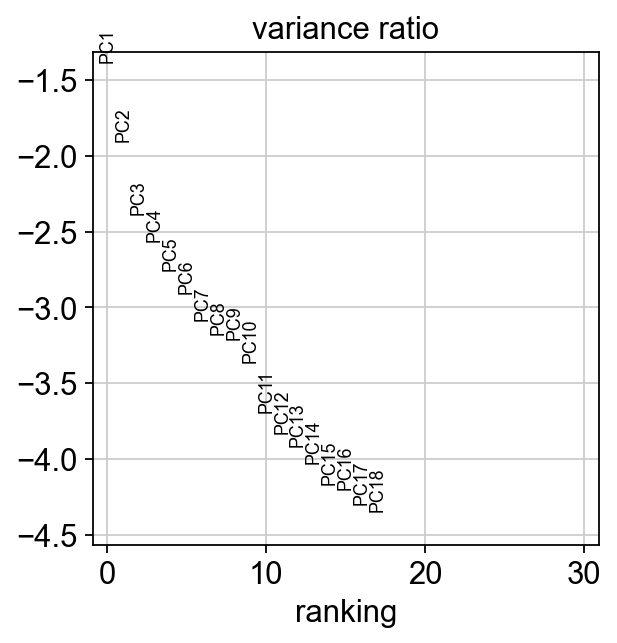

In [24]:
new_adata = adata[:, selected_genes]
sc.tl.pca(new_adata, svd_solver='arpack')
sc.pl.pca(new_adata, color=['label'])
sc.pl.pca_variance_ratio(new_adata, log=True)

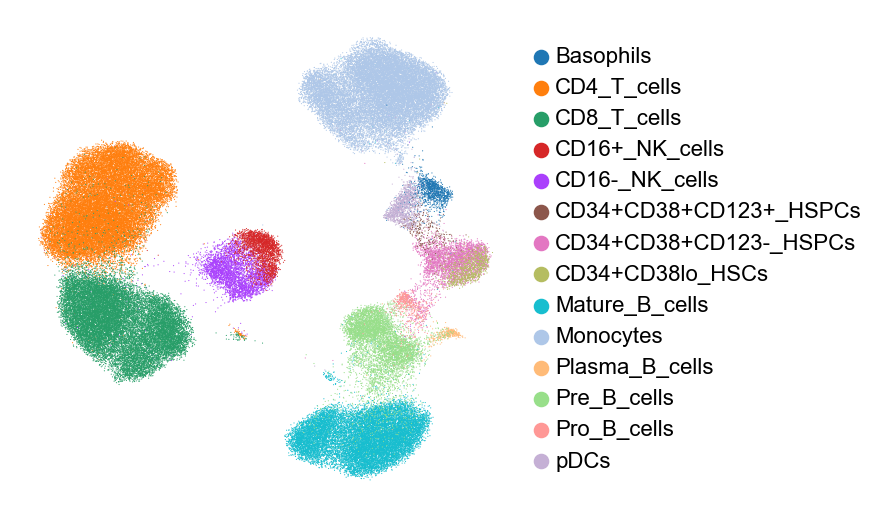

In [25]:
sc.pp.neighbors(new_adata, n_pcs=12)
sc.tl.umap(new_adata)
sc.pl.umap(adata, color=['label'], frameon=False, size=1., legend_fontsize=10, title='')